## Data Analysis in Python through the HTRC Feature Reader
Summary: *Using the 4.8 million volume Extracted Features Dataset from the HathiTrust Research Center, we introduce you to the popular SciPy stack of data science tools in Python, particularly the Pandas library.*

The HathiTrust holds nearly 15 million digitized volumes from libraries around the world. In addition to their individual value, these works in aggregate are extremely valuable for historians. Spanning centuries and genres, a scholar can make inferences about cultural, linguistic, historic, and structural trends in the published word. To simplify access to this collection, the HathiTrust Research Center (HTRC) has released the Extracted Features dataset (Capitanu et al. 2015).

In this lesson, I introduce a library, the HTRC Feature Reader, for working with the Extracted Features dataset using the Python programming language. The HTRC Feature Reader is structured to support work using popular data science libraries, particularly Pandas. In teaching analysis of HathiTrust materials through the HTRC Feature Reader, this tutorial teaches skills that will benefit general data analysis in Python.


Today, you'll learn:

- How to work with "notebooks", a useful, interactive way of data science in Python;
- Methods to read and visualize text data for millions of books with the HTRC Feature Reader; and
- Data malleability: selecting, slicing, and summarizing Extracted Feature data using the flexible "DataFrame" structure.

## The Parts

The **HathiTrust Research Center** (**HTRC**) is the research arm of the HathiTrust, tasked with supporting research usage of the works held by the HathiTrust. Particularly, this support involves mediating large-scale access to material in a non-consumptive manner, which aims to allow research over a work without enabling that work to be traditionally enjoyed or read by a human reader.  Huge digital collections can be of public benefit by allowing scholars to make insights about history and culture, and the non-consumptive model allows for these uses to be sought within the restrictions of intellectual property law.

As part of their mission, the HTRC has released the **Extracted Features** dataset, of features derived for every page of 4.8 million 'volumes' (a generalized term referring to the different types of materials in the HathiTrust collection, of which books are the most prevalent type).

What is a feature? A **feature** is a quantifiable marker of something measurable, a datum. A computer cannot understand the meaning of a sentence implicitly, but it can understand the counts of various words and word forms, or the presence or absence of stylistic markers, from which it can be trained to better understand text. In other words, in text analytics a feature is text converted to the language of the algorithm. A dataset of features can be non-consumptive, assuming there isn't enough information to reconstruct the book text from the features, but is also likely the exact same information a researcher would traditionally have to extract themselves.

Not all features are useful, and not all algorithms use the same features. The HTRC Extracted Features Dataset includes information such as counts of word occurrences tagged by part of speech, line and sentence counts, and counts of characters at the leftmost and rightmost sides of a page. No positional information is provided, so the data does not specify if 'brown' was followed by 'dog', though the information is shared for every single page, so you can at least infer how often 'brown' and 'dog' occurred in the same general vicinity within a text.

With easy access and features already extracted, the Extracted Features dataset offers a great entry point to programmatic text analysis and text mining. To further simplify beginner usage, the HTRC has released the HTRC Feature Reader. The **HTRC Feature Reader** scaffolds use of the dataset with the Python programming language.

This tutorial teaches the fundamentals of using the Extracted Features dataset with the HTRC Feature Reader. The Feature Reader is designed to make use of data structures from the most popular scientific tools in Python, so the skills taught here will apply to other settings of data analysis. In this way, the Extracted Features dataset is a particularly good use case, one useful to historians, for more general skills.

## Possibilities

Historians have access to a huge, century-spanning dataset in the HTRC Extracted Features dataset. It provides extracted textual information for each page in 4 million scanned books. This dataset is useful for the access it provides to the published word, but in having data pre-extracted, it also reduces the number of steps a scholar needs to take in text analysis, and makes research easier for others to reproduce.

Though it is relatively new, the Extracted Features dataset is already seeing use by scholars, as seen on a [page collected by the HTRC](https://wiki.htrc.illinois.edu/display/COM/Extracted+Features+in+the+Wild). [Mimno (2014)](http://mimno.infosci.cornell.edu/wordsim/nearest.html) has processed word co-occurrence tables per year, allowing others to view how correlations between topics change over time. [Underwood (2015)](https://sharc.hathitrust.org/genre) has identified genre (fiction, poetry, drama) for 178k books and released genre-specific word counts, against which [Forster (2015)](http://cforster.com/2015/09/gender-in-hathitrust-dataset/) was able to study author gender by genre.

## Suggested Prior Skills

This lesson aims to provide a gentle but technical introduction to text analysis in Python with the HTRC Feature Reader. Most of the code is provided, but is most useful if you are comfortable tinkering with it and seeing how outputs change when you do.

We recommend a baseline knowledge of Python conventions, which can be learned with Turkel and Crymble's [series of Python lessions](http://programminghistorian.org/lessons/introduction-and-installation) on Programming Historian.

The skills taught here are focused on flexibly accessing and working with already-computed text features. For a better understanding of the process deriving word features, Programming Historian provides a lesson on [Counting Frequencies](http://programminghistorian.org/lessons/counting-frequencies), by Turkel and Crymble.

# Download the Lesson Files

To follow along, download **lesson_files.zip** and unzip it to any directory you choose.

The lesson files include a sample of files from the HTRC Extracted Features dataset. After you learn to use the EF data in this lesson, you may want to work with your own data. The details on how to do this are described in [Appendix: rsync](#Appendix: rsync).

## Installation

For this lesson, you need to install the HTRC Feature Reader library for Python alongside the data science libraries that it depends on. 

### Installing a Python distribution

The common way to install Python packages is using `pip`. If you have Python installed with pip, you can skip this section. However, if you don't know what `pip` is or if the dependencies are creating issues for you, you can avoid considerable hassle by using Anaconda.

Anaconda is an easy-to-install Python distribution that already includes most of the dependencies for the HTRC Feature Reader.

To install Anaconda, download the installer for your system from the [Anaconda download page](https://www.continuum.io/downloads) and follow their instructions for installation of either the Windows 64-bit Graphical Installer or the Mac OS X 64-bit Graphical Installer. You can choose either version of Python for this lesson. If you have followed earlier lessons on Python at the *Programming Historian*, you are using Python 2, but the HTRC Feature Reader also supports Python 3.

![Conda Install](images/conda-install.PNG)

### Installing the HTRC Feature Reader

The HTRC Feature Reader can be installed by command line. First open a terminal application:

- *Windows*: Open 'Command Prompt' from the Start Menu and type: `activate`.
- *Mac OX/Linux*: Open 'Terminal' from Applications and type `source activate`.

If Anaconda was properly installed, you should see something similar to this:

![](images/activating-env.png)

Now, you need to type one command:

```bash
pip install htrc-feature-reader
```

This command installs the HTRC Feature Reader and its necessary dependencies. That's it! At this point you have everything necessary to start reading HTRC Feature Reader files.

> *psst*, advanced users: If you installed the HTRC Feature Reader *without* Anaconda, you'll need to install two additional libraries for this lesson with `pip install matplotlib jupyter`. Also, note that not all manual installations are alike because of hard-to-configure system optimizations. If you think your code is going slow, you should check that Numpy has access to [BLAS and LAPACK libraries](http://stackoverflow.com/a/19350234/233577) and install [Pandas recommended packages](http://pandas.pydata.org/pandas-docs/version/0.15.2/install.html#recommended-dependencies). The rest is up to you, advanced user!

## Start a Notebook

Using Python the traditional way -- writing a script to a file and running it -- can become clunky for text analysis, where the ability to look at and interact with data is invaluable.
This lesson uses an alternative approach: Jupyter notebooks.

Jupyter gives you an interactive version of Python (called IPython) that you can access in a "notebook" format in your web browser. This format has many benefits. The interactivity means that you don't need to re-run an entire script each time: you can run or re-run blocks of code as you go along, without losing your enviroment (i.e. the variables and code that are already loaded). The notebook format makes it easier to examine bits of information as you go along, and allows for text blocks to intersperse a narrative.

![Jupyter Code Blocks](images/notebook1.PNG)

From the Start Menu (Windows) or Applications directory (Mac OS), open "Jupyter notebook". This will start Jupyter on your computer and open a browser window. Keep the console window in the background, the browser is where the magic happens.

![Jupyter Code Blocks](images/open-notebook.PNG" width="250px)

If your web browser does not open automatically, Jupyter can be accessed by going to the address "localhost:8888" - or a different port number, which is noted in the console ("The Jupyter Notebook is running at..."):

![](images/notebook-start.png)

Jupyter is now showing a directory structure from your home folder. Navigate to the lesson folder where you unzipped **lesson-files.zip**.

In the lesson folder, open `Start Here.pynb`: your first notebook!

![](images/notebook-hello-world.png)

Here there are instructions for editing a cell of text or code, and running it. Try editing and running a cell, and notice that it only affects itself. Here are a few tips for using the notebook as the lesson continues:

- New cells are created with the <i class="fa-plus fa"> Plus</i> button in the toolbar. When not editing, this can be done by pressing 'b' on your keyboard.
- New cells are "code" cells by default, but can be changed to "Markdown" (a type of text input) in a dropdown menu on the toolbar. In edit mode, you can paste in code from this lesson or type it yourself.
- Switching a cell to edit mode is done by pressing Enter.
- Running a cell is done by clicking <i class="fa-step-forward fa"> Play</i> in the toolbar, or with `Ctrl+Enter` (`Cmd+Return` on Mac OS). To run a cell and immediately move forward, use `Shift+Enter` instead.

> An example of a full-fledged notebook is included with the lesson files: `Example Notebook: Lesson Draft.ipynb`.

Before continuing, click on the title to change it to something more descriptive than "Start Here".

## Reading your First Volume
The HTRC Feature Reader library has three main objects: **FeatureReader**, **Volume**, and **Page**.

The **FeatureReader** object is the interface for loading the dataset files and making sense of them. The files are originally in the JSON format and compressed, which FeatureReader decompresses and parses. It creates an iterator over files, allowing one-by-one access to the files as Volumes. A **Volume** is a representation of a single book or other work. This is where you access features about a work. Many features for a volume are collected from individual pages, to access Page information, you can use the **Page** object.

Let's load two volumes to understand how the FeatureReader works.

In [ ]:
from htrc_features import FeatureReader
# Remember to use '/' for windows, else '\'
paths = ['data/sample-file1.basic.json.bz2', 'data/sample-file2.basic.json.bz2']
fr = FeatureReader(paths)
for vol in fr.volumes():
    print(vol.title)

June / by Edith Barnard Delano ; with illustrations.
You never know your luck; being the story of a matrimonial deserter, by Gilbert Parker ... illustrated by W.L. Jacobs.


Here, the FeatureReader is imported and initialized with file paths pointing to two Extracted Features files. We wrote out the file paths directly here, though for advanced use there are better ways to [deal with paths](https://docs.python.org/2/library/os.path.html#os.path.join) in Python. An initialized FeatureReader can be iterated through with a `for` loop. The code in the loop is run for every single volume: the Volume() object for the first volume is assigned to the variable `vol`, the loop code is run, then the next volume is set to `vol`, and so on.

You may recognize `for` loops from past experience iterating through what is known as a `list` in Python. However, it is important to note that `fr.volumes()` is *not* a list. If you try to access it directly, it won't print all the volumes; rather, it identifies itself as a different data structure known as a generator:

![](images/generator.png)

What is a generator, and why do we iterate over it?

Generators are the key to working with lots of data. They allow you to iterate over a set of items that don't exist yet, preparing them only when it is their turn to be acted upon. 

Remember that there are 4.8 million volumes in the Extracted Features dataset. When coding at that scale, you need to be be mindful of two rules:

1. Don't hold everything in memory: you can't. Use it, reduce it, and move on.
2. Don't devote cycles to processing something before you need it.

A generator simplifies such on-demand, short term usage. Think of it like a pizza shop making pizzas when a customer orders, versus one that prepares them beforehand. The traditional approach to iterating through data is akin to making *all* the pizzas for the day before opening. Doing so would make the buying process quicker, but also adds a huge upfront time cost, needs larger ovens, and necessitates the space to hold all the pizzas at once. An alternate approach is to make pizzas on-demand when customers buy them, allowing the pizza place to work with smaller capacities and without having pizzas laying around the shop. This is the type of approach that a generator allows.

Volumes need to be prepared before you do anything with them, being read, decompressed and parsed. This 'initialization' of a volume is done when you ask for the volume, *not* when you create the FeatureReader. In the above code, after you run `fr = FeatureReader(paths)`, there are are still no `Volume` objects held behind the scenes: just the pointers to the file locations. The files are only read when their time comes in the loop on the generator `fr.volumes()`.

If you tried to read hundreds of volumes when the FeatureReader is initialized (as you can try, against our advice, with `list(fr.volumes())`, that command would take a very long time, and if you had a bug in later actions, the waiting would be for naught. With enough volumes, it is also likely that your system would run out of RAM, because all the volumes would be held in memory at the same time. Using the generator, Python assumes that you only need the volume within its turn in the loop: after moving on to the next volume in the iterator, the earlier one is thrown away. Because of this one-by-one reading, the items of a generator cannot be accessed out of order (e.g. you cannot ask for the third item of `fr.volumes()` without going through the first two first.

## What's in a volume?

Let's take a closer look at what features are accessible for volumes. For clarity, we'll grab the first volume to focus on, which can conveniently be accessed with the `first()` method. Any code you write can easily be run later with a `for vol in fr.volumes()` loop.

In [ ]:
# Reading a single volume
vol = fr.first()
vol

While the majority of the HTRC Extracted Features dataset is *features*, quantitative abstractions of a book's written content, there is also a small amount of metadata included for each volume. We already saw `Volume.title` accessed earlier. Other metadata includes:

- `Volume.id`: A unique identifier for the volume in the HathiTrust and the HathiTrust Research Center.
- `Volume.year`: The publishing date of the volume.
- `Volume.language`: The classified language of the volume.
- `Volume.oclc`: The OCLC control number(s).

The volume id can be used to pull more information from other sources. The scanned copy of the book can be found from the HathiTrust Digital Library, when available, by accessing `http://hdl.handle.net/2027/{VOLUME ID}`. For this volume, that would be: http://hdl.handle.net/2027/nyp.33433074811310.

In [ ]:
print("http://hdl.handle.net/2027/%s" % vol.id)

http://hdl.handle.net/2027/nyp.33433074811310


![Digital copy of sample book](images/June-cover.png)

Since the focus of EF is features, more in-depth metadata like genre and subject class needs to be grabbed from other sources. For example, the [HathiTrust Bibliographic API](https://www.hathitrust.org/bib_api) returns information about a book specified by its id; for our current example, that is http://catalog.hathitrust.org/api/volumes/full/htid/nyp.33433074811310.json. Another additional data source for metadata is the [HTRC Solr Proxy](https://wiki.htrc.illinois.edu/display/COM/Solr+Proxy+API+User+Guide), which allows searches for many books at a time.

Data from the Solr Proxy is accessible for Public Domain volumes with `Volume.metadata`:

In [ ]:
extra_meta = vol.metadata
# Example field: call number
extra_meta['callnosort']

['PZ3.D3726 J']

Calling detailed metadata is useful for small data settings, but using it pings the HTRC servers and adds overhead, so an efficient large-scale algorithm should avoid `vol.metadata`.

## Our First Feature Access: Visualizing Words Per Page

It's time to access the first features of `vol`: a table of total words for every single page. These can be accessed simply by calling `vol.tokens_per_page()`.

> If you are using a Jupyter notebook, returning this table at the end of a cell formats it nicely in the browser. Below, you'll see us append `.head()` to the `tokens` table, which allows us to inspect just the first 5 rows. Jupyter automatically guessed that you want to display the information from the last code line of the cell.

In [ ]:
tokens = vol.tokens_per_page()
# Show just the first few rows, so we can look at what it looks like
tokens.head()

count
page       
1         5
2         0
3         1
4         0
5         1

This is a straightforward table of information, similar to what you would see in Excel or Google Spreadsheets. Listed in the table are page numbers and the count of words on each page. With only two dimensions, it is trivial to plot the number of words per page. The table structure holding the data has a `plot` method for data graphics. Without extra arguments, `tokens.plot()` will assume that you want a line chart with the page on the x-axis and word count on the y-axis.

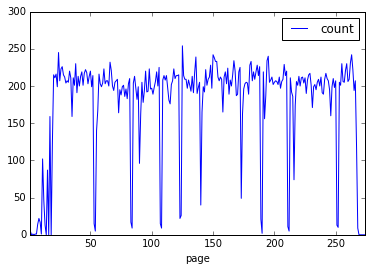

In [ ]:
%matplotlib inline
tokens.plot()

> `%matplotlib inline` tells Jupyter to show the plotted image directly in the notebook web page. It only needs to be called once, and isn't needed if you're not using notebooks.

On some systems, this may take some time the first time. It is clear that pages at the start of a book have less words per page, after which the count is fairly steady except for occasional valleys.

You may have some guesses for what these patterns mean; a look at the [scans](http://hdl.handle.net/2027/nyp.33433074811310) confirms that the large valleys are often illustration pages or blank pages, small valleys are chapter headings, and the upward pattern at the start is from front matter. 

Not all books will have the same patterns so we can't just codify these correlations for millions of books. However, looking at this plot makes clear an inportant assumption in text and data mining: that there are patterns underlying even the basic statistics derived from a text. The trick is to identify the real patterns and teach them to a computer.

### Understanding DataFrames

Wait... how did we get here so fast!? We went from a volume to a data visualization in two lines of code. The magic is in the data structure used to hold our table of data: a DataFrame.

A **DataFrame** is a type of object provided by the data analysis library, Pandas. **Pandas** is very common for data analysis, making Python feasible for activities that in the past would have been much more appropriate in R or Matlab.

In the first line, `vol.tokens_per_page()` returns a DataFrame, something that can be confirmed with `type(tokens)`. This means that _after setting `tokens`, we're no longer working with HTRC-specific code, just book data held in a common and very robust table-like construct from Pandas_. `tokens.head()` used a DataFrame method to look at the first few rows of the dataset, and `tokens.plot()` uses a method from Pandas to visualize data.

In [ ]:
type(vol.tokens_per_page())

pandas.core.frame.DataFrame

Many of the methods in the HTRC Feature Reader return DataFrames. The aim is to fit into the workflow of an experienced user, rather than requiring them to learn proprietary new formats. For new Python data mining users, learning to use the HTRC Feature Reader means learning many data mining skills that will translate to other uses.

## Loading a Token List

The information contained in `vol.tokens_per_page()` is minimal, a sum of all words in the body of each page. 

The Extracted Features dataset also provides token counts with much more granularity: for every part of speech (e.g. noun, verb) of every occurring capitalization of every word of every section (i.e. header, footer, body) of every page of the volume. 

`tokens_per_page()` only kept the "for every page" grouping, to get section-,pos-, and word-specific details, you can use `vol.tokenlist()`:

In [ ]:
tl = vol.tokenlist()
# Let's look at some words deeper into the book:
# from 1000th to 1100th row, skipping by 10 [1000:1100:10]
tl[1000:1100:10]

count
page section token pos       
24   body    years NNS      1
25   body    7     CD       1
             Oh    UH       1
             asked VBD      1
             could MD       1
             give  VB       1
             him   PRP      2
             lace  NN       1
             may   MD       1
             n't   RB       1

In [ ]:
# THIS IS JUST FOR THE SCREENSHOT, NOT TEXT
tl[1000:1001]

count
page section token pos       
24   body    years NNS      1

As before, the data is returned as a Pandas DataFrame. This time, there is much more information. Consider a single row:

![](images/single-row-tokencount.png)

The columns in bold are an index. Unlike the typical one-dimensional index seen before, here there are four dimensions to the index: page, section, token, and pos. This row says that for the 24th page, in the body section (i.e. ignoring any words in the header or footer), the word 'years' occurs 1 time as an plural noun. The part-of-speech tag for a plural noun, `NNS`, follows the [Penn Treebank](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) definition.

> The "words" on the first page seems to be OCR errors for the cover of the book. The HTRC Feature Reader refers to "pages" as the $n^{th}$ scanned image of the volume, not the actual number printed on the page. This is why "page 1" for this example is the cover.

Tokenlists can be retrieved with arguments that fold certain dimensions, such as `case`, `pos`, or `page`. You may also notice that, by default, only 'body' is returned, a default that can be overridden.

Look at the following list of commands: can you guess what the output will look like? Try for yourself and observe how the output changes.

 - `vol.tokenlist(case=False)`
 - `vol.tokenlist(pos=False)`
 - `vol.tokenlist(pages=False, case=False, pos=False)`
 - `vol.tokenlist(section='header')`
 - `vol.tokenlist(section='group')`

Details for what arguments are taken are in the [documentation](http://htrc.github.io/htrc-feature-reader/htrc_features/feature_reader.m.html#htrc_features.feature_reader.Volume.tokenlist) for the Feature Reader.

In [ ]:
# Preparing where we were at the end of the last notebook
from htrc_features import FeatureReader
fr = FeatureReader(['data/sample-file1.basic.json.bz2', 'data/sample-file2.basic.json.bz2'])
vol = fr.first()
tokens = vol.tokens_per_page()
tl = vol.tokenlist()

## Working with DataFrames

The Pandas DataFrame type returned by the HTRC Feature Reader is very malleable. To work with the tokenlist that you retrieved earlier, three skills are particularily valuable:

1. Selecting subsets by a condition
2. Slicing by index
3. Grouping and aggregating

### Selecting Subsets of a DataFrame by a Condition

Consider this example need: *I only want to look at tokens that occur more than ten times on a page.* 
Remembering that the table-like output from the HTRC Feature Reader is a Pandas DataFrame, the way to pursue this goal is to learn to filter and subset DataFrames. Knowing how to do so is important for working with just the data that you need.

To subset individual rows of a DataFrame, you can provide a series of True/False values to the DataFrame, formatted in square brackets. Consider this fake example:

```python
to_keep = [True, False, False, ..., True]
fake_dataframe[to_keep]
```

After receiving these boolean values, the DataFrame goes through every row and returns only the ones that match up to "True" in the given order. So, *the task of subsetting a DataFrame is a matter of figuring out the True/False values for which rows you want to keep.*

Consider the example need in that context. To select just the tokens that occur more than 10 times on a page, we need to determine what rows match the criteria, i.e. *"this token has a count which is greater than 10"*. Let's try to convert that goal to code.

First, "this page has a count" means that we are concerned specifically in the 'count' column, which can be singled out from our `tl` table with `tl['count']`. "Greater than 10" is formalized as `> 10` so try the following and see what you get:

```python
tl['count'] > 10
```

```
page  section  token          pos
1     body     0              CD     False
...
267   body     prince         NN     False
               quite          RB     False
               ran            VBD    False
```

It is a DataFrame of True/False values! Each value indicates whether the 'count' column in the row matches the criteria or not. We haven't selected a subset yet, we simply asked a question and were told for each row when the question was true or false.

> You may wonder why page, section, token, and pos are still seen, even though 'count' was selected. This is because, as noted earlier, these are part of the DataFrame *index*, so they're part of the information about that row. You can convert the index to data columns with `reset_index()`. In this lesson we will keep the index intact, though there are circustances with there are benefits to resetting it.

Armed with the True/False values of whether each value of 'count' is or isn't greater than 10, we can give those values to `tl` in square brackets.

In [ ]:
matches = tl['count'] > 10
tl[matches]

count
page section token pos       
11   body    0     CD      35
             ©     NNP     13
15   body    .     .       31
20   body    ,     ,       19
             the   DT      12
22   body    ,     ,       23
23   body    ,     ,       16
24   body    ,     ,       22
             I     PRP     11
25   body    ,     ,       12
26   body    ,     ,       20
27   body    ,     ,       15
28   body    ,     ,       17
29   body    .     .       13
30   body    the   DT      11
31   body    ,     ,       13
             a     DT      11
32   body    ,     ,       15
33   body    ,     ,       15
34   body    ,     ,       16
35   body    ,     ,       11
36   body    ,     ,       13
38   body    ,     ,       18
             I     PRP     11
39   body    ,     ,       11
40   body    the   DT      12
41   body    ,     ,       14
42   body    ,     ,       12
43   body    ,     ,       16
44   body    ,     ,       18
...                       ...
240  body    ,     ,       14
241  body    ,     ,       12
242  body    I     PRP     11
243  body    "     ''      11
             ,     ,       21
244  body    ,     ,       20
245  body    ,     ,       14
246  body    the   DT      12
247  body    ,     ,       11
             the   DT      12
248  body    ,     ,       13
             the   DT      13
249  body    ,     ,       16
             the   DT      11
250  body    ,     ,       11
             the   DT      11
253  body    ,     ,       11
254  body    ,     ,       20
255  body    !     .       12
             ,     ,       16
256  body    ,     ,       16
257  body    ,     ,       12
258  body    ,     ,       16
259  body    ,     ,       17
260  body    ,     ,       16
261  body    ,     ,       14
262  body    ,     ,       18
263  body    ,     ,       20
264  body    ,     ,       16
266  body    ,     ,       14

[258 rows x 1 columns]

You can move the comparison straight into the square brackets, the more conventional equivalent of the above:

In [ ]:
tl[tl['count'] > 10]

count
page section token pos       
11   body    0     CD      35
             ©     NNP     13
15   body    .     .       31
20   body    ,     ,       19
             the   DT      12
22   body    ,     ,       23
23   body    ,     ,       16
24   body    ,     ,       22
             I     PRP     11
25   body    ,     ,       12
26   body    ,     ,       20
27   body    ,     ,       15
28   body    ,     ,       17
29   body    .     .       13
30   body    the   DT      11
31   body    ,     ,       13
             a     DT      11
32   body    ,     ,       15
33   body    ,     ,       15
34   body    ,     ,       16
35   body    ,     ,       11
36   body    ,     ,       13
38   body    ,     ,       18
             I     PRP     11
39   body    ,     ,       11
40   body    the   DT      12
41   body    ,     ,       14
42   body    ,     ,       12
43   body    ,     ,       16
44   body    ,     ,       18
...                       ...
240  body    ,     ,       14
241  body    ,     ,       12
242  body    I     PRP     11
243  body    "     ''      11
             ,     ,       21
244  body    ,     ,       20
245  body    ,     ,       14
246  body    the   DT      12
247  body    ,     ,       11
             the   DT      12
248  body    ,     ,       13
             the   DT      13
249  body    ,     ,       16
             the   DT      11
250  body    ,     ,       11
             the   DT      11
253  body    ,     ,       11
254  body    ,     ,       20
255  body    !     .       12
             ,     ,       16
256  body    ,     ,       16
257  body    ,     ,       12
258  body    ,     ,       16
259  body    ,     ,       17
260  body    ,     ,       16
261  body    ,     ,       14
262  body    ,     ,       18
263  body    ,     ,       20
264  body    ,     ,       16
266  body    ,     ,       14

[258 rows x 1 columns]

As might be expected, the tokens that occur very often on a single page are "the", "a", and various punctuation. The 'pos' column shows what part-of-speech the word is used in accordding to the [Penn Treebank tags](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html): `DT` is a determiner, `PRP` is a personal pronoun, etc. 

Multiple conditions can be chained with `&` (and) or `|` (or), using regular brackets so that Python known the order of operations. For example, words with a count greater than 3 *and* a count less than 7 are selected in this way:

In [ ]:
tl[(tl['count'] > 3) & (tl['count'] < 7)].head()

count
page section token pos       
9    body    .     .        4
11   body    ©     IN       6
                   NNS      4
12   body    ,     ,        6
17   body    "     ''       5

In [ ]:
tl.index.names

FrozenList(['page', 'section', 'token', 'pos'])

### Slicing DataFrames

Above, subsets of the DataFrame were selected based on a matching criteria for columns. It is also possible to select a DataFrame subset by specifying the values of its index, a process called **slicing**. For example, you can ask, *"give me all the verbs for pages 9-12"*.

In the DataFrame returned by `vol.tokenlist()`, page, section, token, and POS are part of the index (try the command `tl.index.names` to confirm). One can think of an index as the margin content of an Excel spreadsheet: the numbers along the top and letters along the right side are the indices. A cell can be referred to as A1, A2, B1... In pandas, however, you can name these, so instead of A, B, C, rows can be referred to by more descriptive names. You can also how multiple levels, so you're not bound by the two-dimensions of a table format. With a multiindexed DataFrame, you can ask for `Page=24,section=Body, ...`.

<img src="images/Excel.PNG" width="300px" />
*One can think of an index as the margin notations in Excel (i.e. 1,2,3... and A,B,C,..), except it can be named and can have multiple levels.*
    
Slicing a DataFrame against a labelled index is done using `DataFrame.loc[]`. Try the following examples and see what is returned:

- Select information from page 17: 
  - `tl.loc[(17),]`
- Select 'body' section of page 17:
  - `tl.loc[(17, 'body'),]`
- Select counts of the word 'Anne' in the 'body' section of page 17:
  - `tl.loc[(17, 'body', 'Anne'),]`

The columns are specified by label in a tuple, in order of index level: i.e. (1st_level_label, 2nd_level_label, 3rd_level_label). To skip specifying a label for a level -- that is, to select everything for that level -- `slice(None)` can be used as a placeholder:

- Select counts of the word 'Anne' for all pages and all page sections
  - `tl.loc[(slice(None), slice(None), "Anne"),]`
  
Finally, it is possible to select multiple labels per level of the multiindex, with a list of labels (i.e. `['label1', 'label2']`) or a sequence defines by a slice (i.e. `slice(start, end)`):

- Select pages 37, 38, and 52
  - `tl.loc[([37, 38, 52]),]`
- Select all pages from 37 to 40
  - `tl.loc[(slice(37, 40)),]`
  
> The reason for the comma in `tl.loc[(...),]` is because columns can be selected in the same way after the comma. Pandas DataFrames can have a multiple-level index for columns, but the HTRC Feature Reader does not use this.

Knowing how to slice, let's try to find the word "CHAPTER" in this work and compare to the earlier counts of tokens per page. 

The token list we previously set to `tl` only included body text, to include headers and footers in our search for `CHAPTER` we'll grab a new tokenlist with `section='all'` specified.

In [ ]:
tl2 = vol.tokenlist(section='all')
chapter_pages = tl2.loc[(slice(None), slice(None), "CHAPTER"),]
chapter_pages

count
page section token   pos       
19   header  CHAPTER NNP      1
35   header  CHAPTER NNP      1
56   header  CHAPTER NNP      1
73   header  CHAPTER NNP      1
91   header  CHAPTER NNP      1
115  header  CHAPTER NNP      1
141  header  CHAPTER NNP      1
158  header  CHAPTER NNP      1
174  header  CHAPTER NNP      1
193  header  CHAPTER NNP      1
217  body    CHAPTER NNP      1
231  header  CHAPTER NNP      1
246  header  CHAPTER NNP      1

Earlier, token counts were visualized using `tokens.plot()`, a built-in function of DataFrames that uses the Matplotlib visualization library. 

We can add to the earlier visualization by using Matplotlib directly. Without dwelling too much on the specifics, try the following code which simply goes through every page number in the earlier search for 'CHAPTER' and adds a red vertical line at the place in the chart with `matplotlib.pyplot.axvline()`:

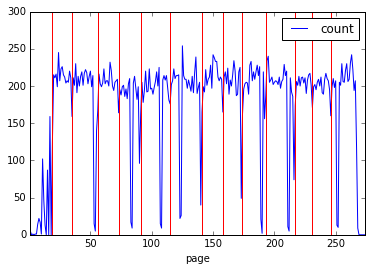

In [ ]:
# Get just the page numbers from the search for "CHAPTER"
page_numbers = chapter_pages.index.get_level_values('page')

# Visualize the tokens-per-page from before
tokens.plot()

# Add vertical lines for pages with "CHAPTER"
import matplotlib.pyplot as plt
for page_number in page_numbers:
    plt.axvline(x=page_number, color='red')

### Grouping DataFrames

Up to this point, the token count DataFrames have been subsetted, but not modified from the way they were returned by the HTRC Feature Reader. There are many cases where one may want to perform aggregation or transformation based on subsets of data. To do this, Pandas supports the 'split-apply-combine' pattern (**TODO cite Hadley W.**).

Split-apply-combine refers to the process of dividing a dataset into groups (*split*), performing some activity for each of those groups (*apply*), and joining the new groups back together into a single DataFrame (*combine*).

<img src="images/split-apply-combine.png" width="500px"/>

<img src="images/example-split-apply-combine.png" width="600px"/>
** Figure: Example of Split-Apply-Combine, averaging movie grosses by director.**

Split-apply-combine processes are supported on DataFrames with `groupby()`, which tells Pandas to split by some criteria. From there, it is possible to apply some change to each group individually, after which Pandas combines the affected groups into a single DataFrame again.

Try the following, can you tell what happens?

```
tl.groupby(level=["pos"]).sum()
```

The output is a count of how much each part-of-speech tag ("pos") occurs in the entire book.

- *Split* with `groupby()`: We took the token count dataframe that is set to `tl` and grouped by the part-of-speech (`pos`) level of the index. This means that rather than thinking into terms of rows, Pandas is now thinking of the `tl` DataFrame as a series of smaller groups, the groups selected by a common value for part of speech. So, all the personal pronouns ("PRP") are in one group, and all the adverbs ("RB") are in another, and so on.
- *Apply* with `sum()`: These groups were sent to an apply function, `sum()`. Sum is an aggregation function, so it sums all the information in the 'count' column for each group. For example, all the rows of data in the adverb group are summed up into a single count of all adverbs. 
- *Combine*: The combine step is implicit: the DataFrame knows from the `groupby` pattern to take everything that the apply function gives back (in the case of 'sum', just one row for every group) and stick it together.

`sum()` is one of many convenient functions [built-in](http://pandas.pydata.org/pandas-docs/stable/groupby.html) to Panadas. Other useful functions are `mean()`, `count()`, `max()`. It is also possible to send your groups to any function that you write with `apply()`.

> groupby can be used on data columns or an index. To run against an index, as above, use `levels=[index_level_name]` as above. To group against columns, use `by=[column_name]`.

Below are some examples of grouping token counts.

- Find most common tokens in the entire volume (sorting by most to least occurrances)
  - `tl.groupby(level="token").sum().sort_values("count", ascending=False)`
- Count how many pages each token/pos combination occurs on
  - `tl.groupby(level=["token", "pos"]).count()`
  
Remember from earlier that certain information can be called by sending arguments to `vol.tokenlist()`, so you don't always have to do the grouping yourself.

Transformations can also be done, where the process returns the same number of rows as the input groups, but changes based on some grouping. Here is an example of more advanced usage, a [TF\*IDF](https://porganized.com/2016/03/09/term-weighting-for-humanists/) function:

In [ ]:
import numpy as np # For the log function
tl.groupby(level=["token"]).transform(lambda x: x * np.log(1+vol.page_count / x.count()) )

count
page section token         pos          
1    body    0             CD   4.927254
             07481131      CD   5.616771
             3             CD   4.927254
             3433          CD   5.616771
             JUN6          .    5.616771
3    body    :             :    2.445686
5    body    JUNE          NN   2.230340
6    body    .»-.          .    5.616771
7    body    '             POS  1.627190
             'RK           ''   5.616771
             .             .    1.509963
             ._            NN   5.616771
             :             :    4.891372
             :'            VB   5.616771
             LIBRARY       NNP  4.927254
             MEW           NNP  5.616771
             OF            IN   3.692445
             Y'            NNP  5.616771
             YORK          NNP  4.241327
             rttE_         JJ   5.616771
8    body    !             .    0.967346
             "             ''   0.518735
             '             ''   1.627190
             A             DT   3.023903
             FIND          NNP  5.616771
             HERE          RB   4.927254
             I             PRP  1.934692
             LITTLE        NNP  5.616771
             MITE          NNP  5.616771
             MOUNTAIN      NNP  5.616771
...                                  ...
267  body    prince        NN   3.094533
             quite         RB   2.481568
             ran           VBD  3.448222
             returned      VBD  3.692445
             satisfied     VBN  4.241327
             searchingly   RB   4.525405
             she           PRP  2.496872
             smiled        VBD  2.840110
             some          DT   1.958529
             swiftly       RB   4.525405
             the           DT   2.332418
             there         EX   1.405766
                           RB   1.405766
             time          NN   1.639291
             to            TO   3.091450
             turned        VBD  2.519040
             upon          IN   2.128875
             way           NN   1.835654
             where         WRB  2.346437
             whispered     VBD  4.927254
             who           WP   1.477669
             will          MD   1.921294
             —             VBN  1.026346
268  body    .             .    2.264944
             A             DT   3.023903
             CAMBRIDGE     NNP  5.616771
             MASSACHUSETTS NNP  5.616771
             U             NNP  5.616771
             cbe           NN   5.616771
             »             NN   4.241327

[29225 rows x 1 columns]

Compare the function in `transform()` above with the equation:

$ IDF_w = log(1 + \frac{N}{df_w}) $

Document frequency, $df_w$, is just 'how many pages (docs) does the word occur on?' Can you modify the above to use corpus frequency, which is 'how many times does the word occur overall in the corpus (i.e. across all pages)?'

In [ ]:
# Preparing where we were at the end of the last notebook
%matplotlib inline
import matplotlib.pyplot as plt
from htrc_features import FeatureReader
fr = FeatureReader(['data/sample-file1.basic.json.bz2', 'data/sample-file2.basic.json.bz2'])
vol = fr.first()

# More Features in the HTRC Extracted Features Dataset

So far we have mainly used token-counting features, accessed through `Volume.tokenlist()`. The HTRC Extracted Features Dataset provides more features at the volume level. Here are other features that are available at the volume level; try them and see what the output is:

- `Volume.line_counts()`: How many vertically spaced lines of text, a measure related to the phyical format of the page.
- `Volume.sentence_counts()`: How many sentences of text: a measure related to the content on a page.
- `Volume.empty_line_counts()`: How many larger vertical spaces are there on the page between lines of text? This can be used as a proxy for paragraph count. This is based on what software was used to OCR so there are inconsistencies: not all scans in the HathiTrust are OCR'd identically.
- `Volume.begin_line_chars()`, `Volume.end_line_chars()`: The count of different characters along the left-most and right-most sides of a page. This can tell you about what kind of page it is: for example, a table of contents might have a lot of numbers or roman numerals at the end of each line
  - *(TODO NOTE TO CO-AUTHORS: this is currently in the ADVANCED FEATURE FILE; I didn't introduce the fact that we have basic/advanced, because we're backing off of that. This means that If we publish this, we either need to update the dataset to only have one file, or simply not talk about this) - Peter*

Earlier, we saw that the number of words on a page gave some indication of whether it was a page of the novel or a different kind of page. We can see that line count is another contextual 'hint' that could help a researcher focus only on the real content of a page:

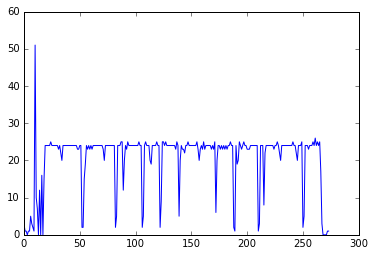

In [ ]:
line_counts = vol.line_counts()
plt.plot(line_counts)

## Page Level

If you open the raw dataset file for a HTRC EF volume on your computer, you may notice that features are provided for each page. While this lesson has focused on volumes, most of the features that we have seen can be accessed for a single page; e.g. `Page.tokenlist()` instead of `Volume.tokenlist()`. The methods to access the features are named the same, with the exception that `line_count`, `empty_line_count`, and `sentence_count` are not pluralized.

Like iterating over `FeatureReader.volumes()` to get Volume objects, it is possible to iterate across pages with `Volume.pages()`.

# Next Steps

Now that you know the basics of the HTRC Feature Reader, you can learn more about the [Extracted Features dataset](https://analytics.hathitrust.org/features). The [Feature Reader home page](https://github.com/htrc/htrc-feature-reader/blob/master/README.ipynb) contains a lesson similar to this one but for more advanced users (that's you now!), and the [code documentation](http://htrc.github.io/htrc-feature-reader/htrc_features/feature_reader.m.html) gives exact information about what types of information can be called.

Underwood (2015) has released a [custom subset of the HTRC EF Dataset](https://analytics.hathitrust.org/genre), comprised of volumes classified by genre: fiction, poetry, and drama. Though many historians will be interested in other corners of the dataset, fiction is a good place to tinker with text mining ideas because of its expressiveness.

Finally, the repository for the HTRC Feature Feature has [advanced tutorial notebooks](https://github.com/htrc/htrc-feature-reader/tree/master/examples) showing how to use the library further. For example, one advanced tutorial shows how to [derive 'plot arcs' for a text](https://github.com/htrc/htrc-feature-reader/blob/master/examples/Within-Book%20Sentiment%20Trends.ipynb), a process popularized by Jockers (2015).

![Plot Arc Example](images/plot-arc.png)
<center>**Plot Arc Example** </center>

# References

Boris Capitanu, Ted Underwood, Peter Organisciak, Sayan Bhattacharyya, Loretta Auvil, Colleen Fallaw, J. Stephen Downie (2015). "Extracted Feature Dataset from 4.8 Million HathiTrust Digital Library Public Domain Volumes" (0.2)[Dataset]. *HathiTrust Research Center*, doi:10.13012/j8td9v7m.

Matthew L. Jockers (Feb 2015). "Revealing Sentiment and Plot Arcs with the Syuzhet Package". *Matthew L. Jockers*. Blog. http://www.matthewjockers.net/2015/02/02/syuzhet/.

Ted Underwood, Boris Capitanu, Peter Organisciak, Sayan Bhattacharyya, Loretta Auvil, Colleen Fallaw, J. Stephen Downie (2015). "Word Frequencies in English-Language Literature, 1700-1922" (0.2) [Dataset]. *HathiTrust Research Center*. doi:10.13012/J8JW8BSJ.

Hadley Wickham (2011). "The split-apply-combine strategy for data analysis". *Journal of Statistical Software*, 40(1), 1-29.

# Appendix: Downloading custom files via rsync

The HTRC Extracted Features (EF) dataset is accessible using *rsync*, a Unix command line program for syncing files. It is already preinstalled on Linux or Mac OS. Windows users need to use *rsync* by downloading a program such as [https://cygwin.com/](Cygwin), which provides a Unix-like command line environment in Windows.

To download all *1.3 TB* comprising the EF dataset, you can use this command (be aware the full transfer will take a very long time):

```bash
rsync -rv data.sharc.hathitrust.org::pd-features/basic/ .
```

 This recurses (the `-r` flag) through all the folders on the HTRC server, and syncs all the files to a location on your system in this case a `.` meaning "the current folder"). The `-v` flag means `--verbose`, which simply gives you more information.
 You can also sync individual files by inputing a full file path. A list of all file paths is available: 

```bash
rsync -azv data.sharc.hathitrust.org::pd-features/listing/pd-basic-file-listing.txt .
```

 It is also possible to sync a subset of files defined in a text file. The Feature Reader Library [has a document describing steps to compile such a list](https://github.com/htrc/htrc-feature-reader/blob/master/examples/ID_to_Rsync_Link.ipynb).